# 설명 가능 딥러닝 모델

## 설명 가능 딥러닝 실행

In [1]:
!pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 1.0 MB/s eta 0:00:00


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘 불러오기
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# 데이터 가져오기
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 8.86 MiB/s, done.


In [4]:
# 원본 이미지 리스트
images_originals = []

In [5]:
# 하나씩 리스트 넣기
for img_path in glob.glob('./data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))

In [6]:
# 이미지의 크기 
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

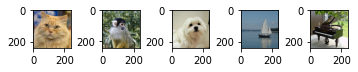

In [7]:
# 원본 이미지 확인
for i, image_o in enumerate(images_originals):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_o)

In [8]:
# 딥러닝 모델
model = VGG16(weights="imagenet", include_top=True)

553467096/553467096 [==============================] - 3s 0us/step


In [9]:
# 원본 이미지 이름, 해당 이미지 인덱스
input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]

In [10]:
# 그레이디언트 CAM 알고리즘 선택
explainer = GradCAM()

In [11]:
# 빈 리스트 만들기
images_cams = []

In [12]:
# 그레이디언트 CAM 알고리즘 실행
for l, i in zip(input_list, imagenet_index):  
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224)) # 이미지 크기 설정
    img = img_to_array(img) # 넘파이 배열
    data = ([img], None)
    grid = explainer.explain(data, model, int(i))  # 그레이디언트 CAM 실행
    explainer.save(grid, ".", './data/img/{}_cam.jpg'.format(l))  # 실행 후 저장 이름

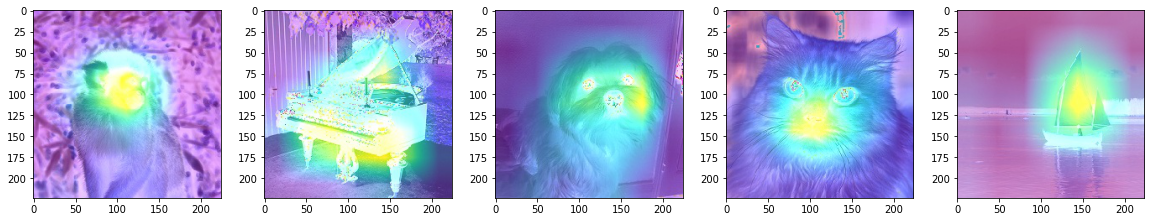

In [13]:
# 그레이디언트 CAM 알고리즘 적용 이미지 불러오기
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_c)

In [14]:
# 오클루전 알고리즘 실행
explainer = OcclusionSensitivity()

In [15]:
# 빈 리스트
images_occ1s = []

In [16]:
# 패치 사이즈
patch_size = 40

In [17]:
# 오클루전 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size) # 패치 사이즈 설정 추가
    explainer.save(grid, ".", './data/img/{}_occ1.jpg'.format(l))

2/2 [==============================] - 0s 134ms/step


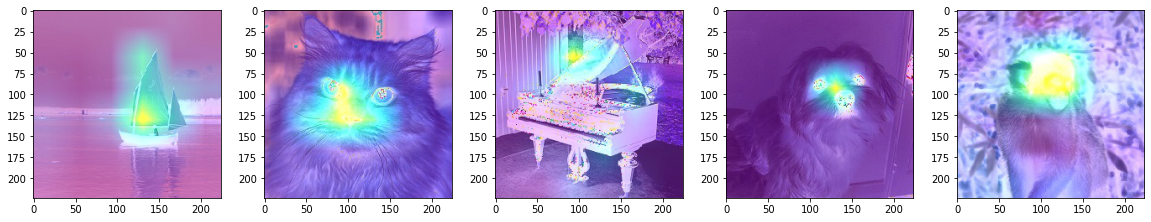

In [18]:
# 오클루전 알고리즘 적용 이미지
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_occ1.jpg'):
    images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

5/5 [==============================] - 1s 138ms/step


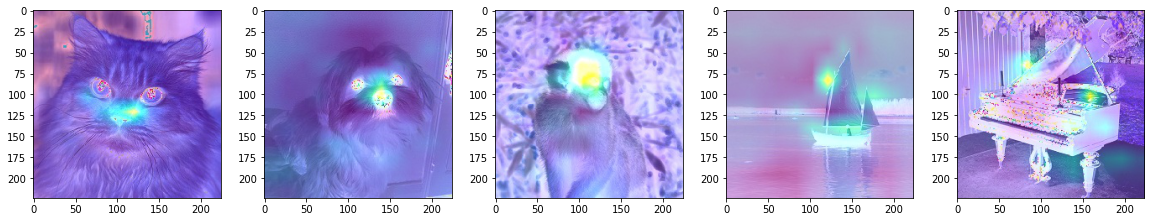

In [19]:
patch_size = 20

images_occ2s = []

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size) 
    explainer.save(grid, ".", './data/img/{}_occ2.jpg'.format(l))

for img_path in glob.glob('./data/img/*_occ2.jpg'):
    images_occ2s.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ2s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)


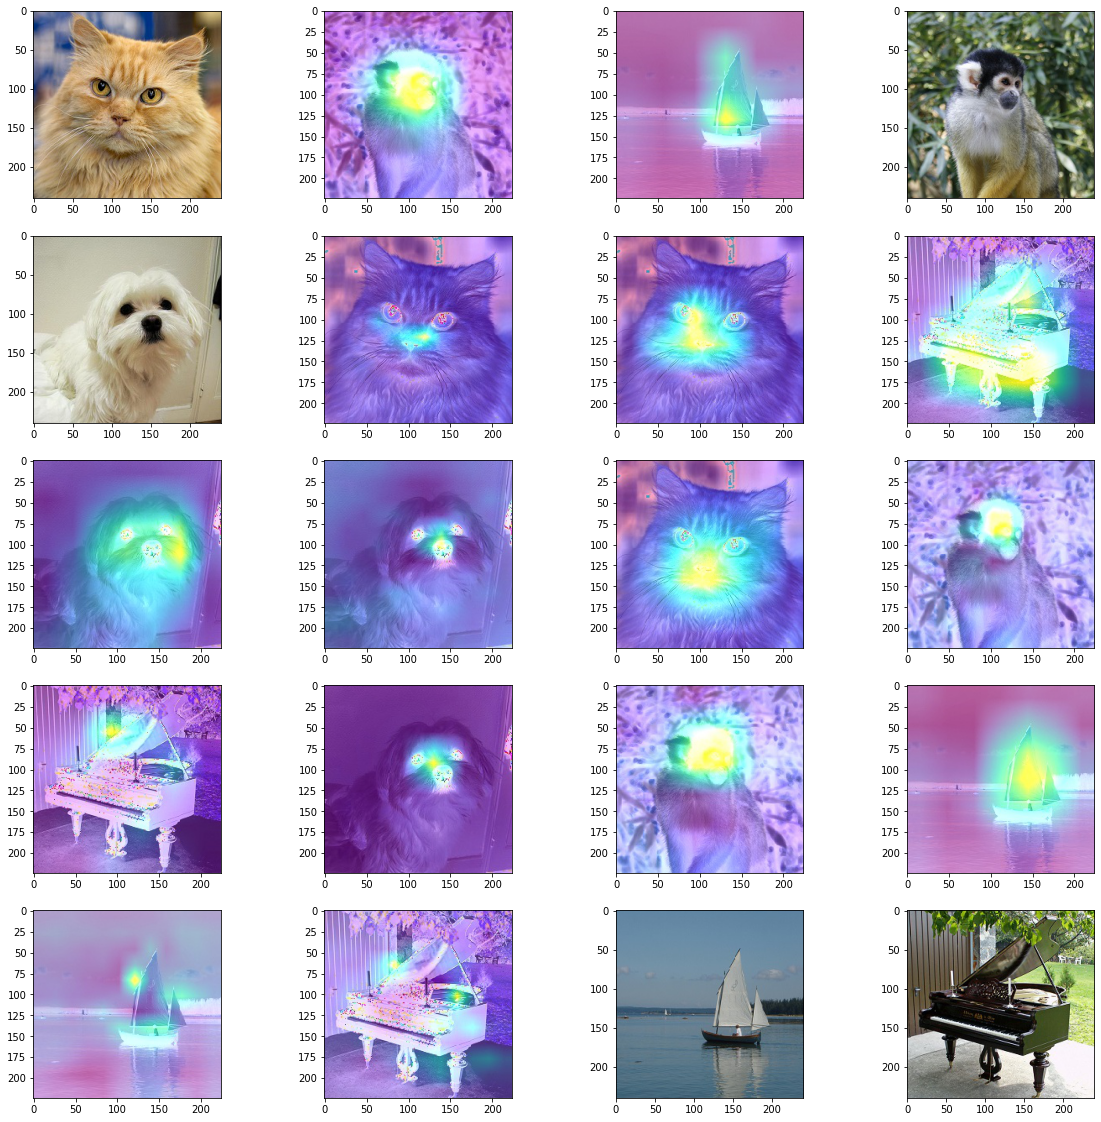

In [20]:
# 전체 이미지 한 눈에 보기.

plt.figure(figsize=(20,20))

images = []
for img_path in glob.glob('./data/img/*.jpg'):
    images.append(mpimg.imread(img_path))

for i, image in enumerate(images):
    plt.subplot(5, 4, i + 1)
    plt.imshow(image)